<a href="https://colab.research.google.com/github/V-Gopi-Kiran/Gopi-Kiran/blob/main/Sentiment_analysis_model_on_Reddit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the necessary modules, and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
df=pd.read_csv('/content/Reddit_Data.csv')
df.head(15)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


##Performing EDA (Exploratory Data Analysis)

In [4]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[8277, 13142, 15830]


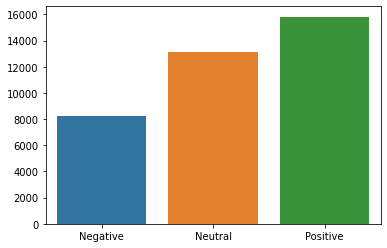

In [5]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [6]:
comment=list(df.clean_comment.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(comment,sentiment))

In [7]:
print(list(reddit_dict.items())[:5])

[(' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ', 1), ('buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke 

In [8]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)    

In [9]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg ', 'you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss '] 
 ['what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ', 'jesus was zen meets jew '] 
 [' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness e

In [10]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [11]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [12]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

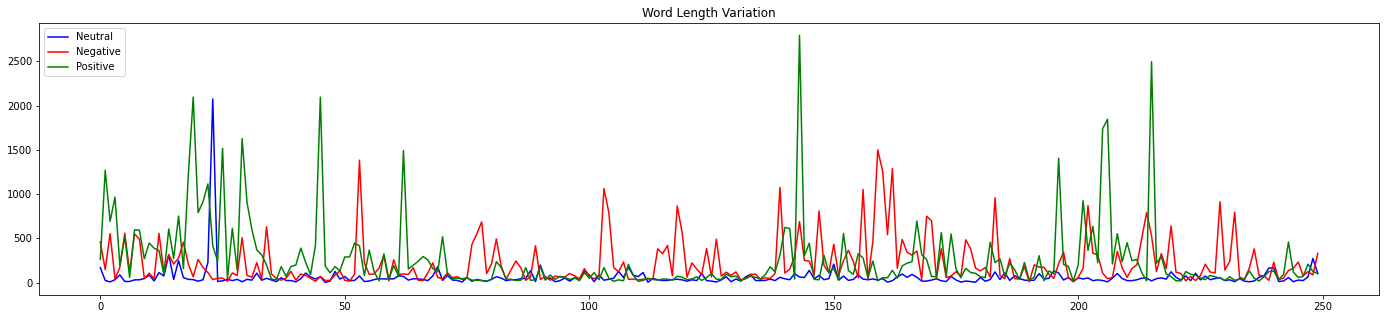

In [13]:
plt.subplots(figsize=(24,5))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [14]:
pos_mean=sum(pos_len)//len(pos_len)
neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

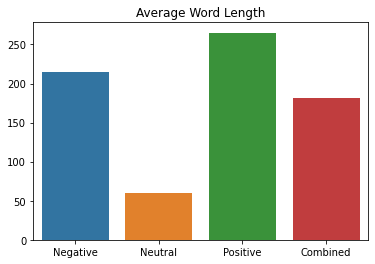

In [15]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

##Tokenization

In [16]:
X=df['clean_comment'].astype('str')
X[:5]

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_comment, dtype: object

In [17]:
lp=""
for i in X:
    lp+=i+" "
print(lp[:100])

 family mormon have never tried explain them they still stare puzzled from time time like some kind 


In [18]:
st=lp.split(' ')
dict_len=len(set(st))

In [19]:
dict_len,len(st)

(55543, 1134781)

In [20]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [21]:
len(tokenizer.word_index)

54720

In [22]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

##One hot encoding the sentiment values

In [23]:
df['category']=df['category'].replace({-1:2})
mp={0:"Neutral",1:"Positve",2:"Negative"}
Y=df['category'].values
Y_hot=to_categorical(Y)
print(Y_hot[:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


##Building the sentiment analysis model 

In [24]:
model=Sequential()
model.add(Embedding(dict_len,64,input_length=175))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(175,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(350,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(700)))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 175, 64)           3554752   
                                                                 
 dropout (Dropout)           (None, 175, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 175, 350)         336000    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 175, 350)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 175, 700)         1962800   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 175, 700)          0

In [25]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [26]:
hist=model.fit(X_train_padded,Y_hot,epochs=5,validation_split=0.2)

Epoch 1/5
932/932 [==============================] - 186s 186ms/step - loss: 0.6219 - accuracy: 0.7416 - val_loss: 0.3535 - val_accuracy: 0.8816
Epoch 2/5
932/932 [==============================] - 173s 186ms/step - loss: 0.2684 - accuracy: 0.9073 - val_loss: 0.2258 - val_accuracy: 0.9313
Epoch 3/5
932/932 [==============================] - 173s 185ms/step - loss: 0.1527 - accuracy: 0.9510 - val_loss: 0.2700 - val_accuracy: 0.9134
Epoch 4/5
932/932 [==============================] - 173s 185ms/step - loss: 0.1032 - accuracy: 0.9692 - val_loss: 0.2838 - val_accuracy: 0.9207
Epoch 5/5
932/932 [==============================] - 173s 185ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.3172 - val_accuracy: 0.9191


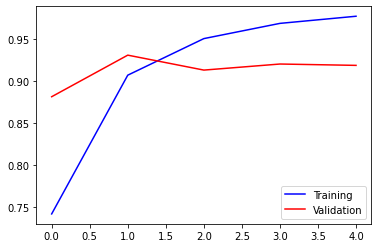

In [27]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

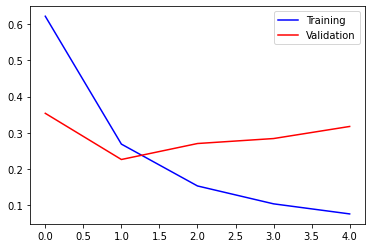

In [28]:
plt.plot(hist.history['loss'],c='b',label='Training')
plt.plot(hist.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

##Checking/predicting data

In [29]:
def predict(s):
    X_tes=[]
    X_tes.append(s)
    X_test=tokenizer.texts_to_sequences(X_tes)
    X_test_padded=pad_sequences(X_test,maxlen=175,padding='post',truncating='post')
    predictions = int(np.argmax(model.predict(X_test_padded),axis=1))
    print("The Predicted Sentiment is",mp[predictions])

In [36]:
pos="Today's weather is pretty good, it is perfect for a picnic"
predict(pos)

The Predicted Sentiment is Positve


In [35]:
neg="You mistake you have made will lead to worse and bigger mistakes"
predict(neg)

The Predicted Sentiment is Negative


In [34]:
Neutral="I am yet to decide my course"
predict(Neutral)

The Predicted Sentiment is Neutral


##TEST IT YOURSELF!! 

In [33]:
test=input("Enter a statement:")
predict(test)

Enter a statement:You are a very good person
The Predicted Sentiment is Positve
